In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)

# Part 1

## Capsicum Example

### Draw a simple countplot

In [4]:
# create dataset
capsicum_data = ['green']*420 + ['yellow']*298 + ['orange']*267 + ['red']*405

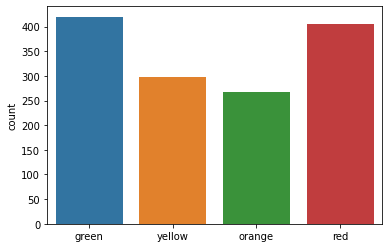

In [5]:
sns.countplot(capsicum_data)
plt.show()

The countplot function returns the matplotlib.axes.Axes class object with the plot drawn onto it. We can use this object to make our plot more informative and appealing. 

### Coloring background and bars

We start with displaying each category's bar in the plot with its corresponding color. In other words, we will show bar representing green capsicum with green color, bar representing red capsicum with red color etc. We will also set background color of the plot.

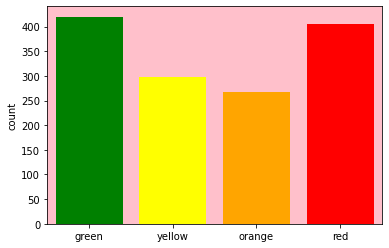

In [6]:
ax = sns.countplot(capsicum_data)
ax.set_facecolor('pink')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    p.set_facecolor(label.get_text())

* The `ax.set_facecolor()` function sets the background color of the entire countplot. 

* The `ax.patches` returns the patches for each of the four bars corresponding to four categories (here, colors) of capsicum. Using `for` loop, we can access each patch one by one and apply many functions on it.  We have applied one such function - `set_facecolor()` to set the color of each of the bar individually.

* `ax.get_xticklabels()` is used to get the labels associated with x-axis ticks. A label associated with x-axis ticks is an object of class matplotlib.text.Text. We can get the actual value by using get_text() method of this class.
> * `list(ax.get_xticklabels())` returns the following - 
>> [Text(0, 0, 'green'), Text(1, 0, 'yellow'), Text(2, 0, 'orange'), Text(3, 0, 'red')]
> * `Text(0, 0, 'green').get_text()` returns 'green' which then can be used to set the color.

### Ordering the bars

We can specify the order in which each category should be displayed in the plot. The countplot function has a parameter - order - for this feature. 

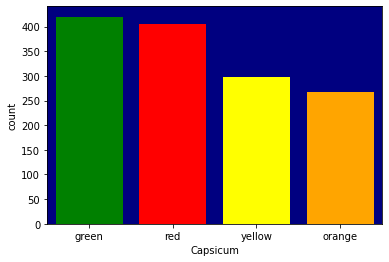

In [7]:
ax = sns.countplot(x=capsicum_data,
                   order=['green', 'red', 'yellow', 'orange'])
ax.set_facecolor('navy')
ax.set_xlabel('Capsicum')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    p.set_facecolor(label.get_text())

* We have passed a list of categories (colors) in the descending order of their counts. 
* Note that the first parameter of `countplot()` is x that accepts the capsicum data.
* `ax.set_xlabel()` is used to label the x axis of the plot. Similarly, `ax.set_ylabel()` can be used for y axis.

### Horizontal Countplot

In some cases, displaying horizontal bars may be more appealing to visuals than the vertical ones. Seaborn's countplot has a parameter - `y` - for that purpose. Instead of passing the capsicum data to `x`, we can pass it to `y` to show the bars horizontally.

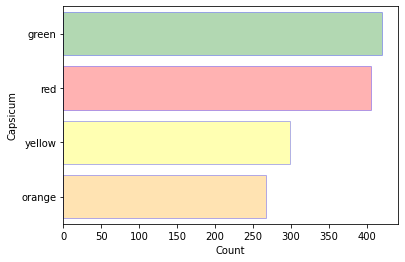

In [8]:
ax = sns.countplot(y=capsicum_data, 
                   order=['green', 'red', 'yellow', 'orange'])
ax.set_facecolor('white')
ax.set_xlabel('Count')
ax.set_ylabel('Capsicum')

for p, label in zip(ax.patches, ax.get_yticklabels()):
    p.set_facecolor(label.get_text())
    p.set_alpha(0.3)
    p.set_edgecolor('blue')

* Now x-axis represents the counts and y-axis represents the categories. We have set the label accordingly.
* p.set_alpha() is used to add transparency in the color. It takes a real value in the range [0, 1], where 0 mean full transparency and 1 means no transparency. 
* p.set_edgecolor() colors the edges of a bar with the color passed.

### Showing counts of each category

Displaying the count of each category at the head of its corresponding bar makes the countplot more informative and objective. Let's try to achieve the same.

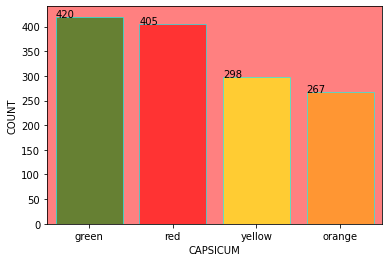

In [9]:
ax = sns.countplot(x=capsicum_data, 
                   order=['green', 'red', 'yellow', 'orange'])
ax.set(xlabel='CAPSICUM', ylabel='COUNT', fc='#FF8080')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    p.set(alpha=0.6, fc=label.get_text(), ec='cyan')
    ax.annotate("{}".format(p.get_height()), 
                (p.get_x(), p.get_height()))

* `ax.annotate()` has its first two parameters mandatory. The first parameter expects the text we want to annotate the plot with and the second one expects the x-y coordinates in pair on the plot where we want to display the count .
`p.get_x()` returns the x coordinate of a patch.
* Since we want to display the count of each of the categories at the top of their respective bars and the height of a bar is equal to the count of the category it represents. `p.get_height()` function returns the height of a patch (bar, in this case). The height value works as both the text and y-coordinate.
* `ax.set()` and `p.set()` offers the capability to specify the values of multiple features of a plot and a patch respectively, in one function call.
* fc and ec are short form for facecolor and edgecolor respectively.

### Enhancing the visualization of counts

We can certainly improve the countplot in many ways such as font size, alignment of count values, text color etc. Let's beautify our countplot.

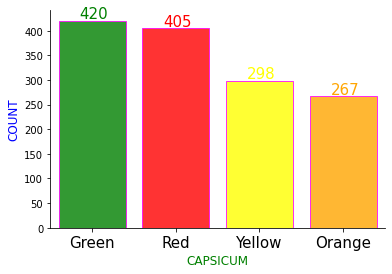

In [10]:
order = ['green', 'red', 'yellow', 'orange']
colors = xticklabels = [label.title() for label in order]

ax = sns.countplot(x=capsicum_data, order=order)
ax.set_xlabel('CAPSICUM', fontsize=12, color='g')
ax.set_ylabel('COUNT', fontsize=12, color='b')
ax.set_xticklabels(xticklabels, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for idx, (p, label) in enumerate(zip(ax.patches, ax.get_xticklabels())):
    p.set(alpha=0.8, fc=label.get_text(), ec='magenta')
    ax.annotate("{}".format(p.get_height()), 
                (p.get_x()+0.25, p.get_height()+5), 
                fontsize=15, color=colors[idx])

* The x-axis and y-axis labels are color-coded and font-size is increased.
* The ticklabels of x-axis is now title-cased with increased font-size.
* The removal of top side boundary of the plot using `ax.spines` enables us to display the counts with increased font-size and sensible colors. Similarly, we can remove boundaries from other sides as well, if required.
* `ax.annotate()` function has been passed with two additional parameters fontsize and color to give each count a specific font-size and color. We can manually adjust the value of x and y coordinates where the counts of each capsicum-color are displayed.

### Horizontal countplot with enhanced visualization

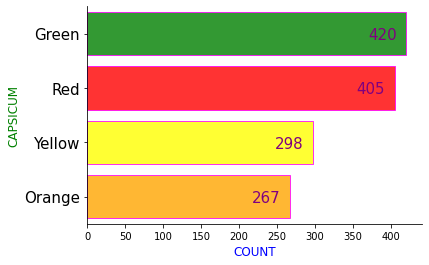

In [11]:
yticklabels = [label.title() for label in order]
ax = sns.countplot(y=capsicum_data, order=order)
ax.set_xlabel('COUNT', fontsize=12, color='b')
ax.set_ylabel('CAPSICUM', fontsize=12, color='g')
ax.set_yticklabels(yticklabels, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for idx, (p, label) in enumerate(zip(ax.patches, ax.get_yticklabels())):
    p.set(alpha=0.8, fc=label.get_text(), ec='magenta')
    ax.annotate("{}".format(p.get_width()), 
                (p.get_width()-50, p.get_y()+0.5),
                fontsize=15, color='purple')

* The functions - ax.get_xticklabels, p.get_x() and p.get_height() are replaced with ax.get_yticklabels(), p.get_y() and p.get_width() respectively in case of horizontal countplot.
* It is better to display the counts inside the bars in horizontal countplot in order to keep the visualization concise and good-looking.

---
---

# Part 2


Sometimes it is required to visualize the frequency distribution of a categorical variable with respect to the values of another categorical value. For example, a company launches a new product in the market with three variants. After one financial year of its launch, the company wants to find out the quantities sold in each quarter for each of its three variants. Here, we have one categorical variable, quarter number, which has the values – 1, 2, 3, 4, and another categorical variable, the product, which has three variants – v1, v2, v3.

We can have these types of variables as columns in a pandas dataframe that can be used as a data to be passed to countplot function. The support of pandas dataframe in countplot function is of great help because most of the time, exploratory data analysis is performed using dataframes.
Let’s take the following movies data. This data has the six columns and 440 number of rows. Shown below is the first few rows of the data.

In [12]:
url = "https://gist.github.com/RJ2494/003d8e24c2b314853e68f7816f167255/archive/f608f2f9b4dec13db0f7f63021dd8096fdde9cac.zip"
!wget $url

--2020-06-21 20:25:03--  https://gist.github.com/RJ2494/003d8e24c2b314853e68f7816f167255/archive/f608f2f9b4dec13db0f7f63021dd8096fdde9cac.zip
Resolving gist.github.com (gist.github.com)... 140.82.118.3
Connecting to gist.github.com (gist.github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/gist/003d8e24c2b314853e68f7816f167255/zip/f608f2f9b4dec13db0f7f63021dd8096fdde9cac [following]
--2020-06-21 20:25:04--  https://codeload.github.com/gist/003d8e24c2b314853e68f7816f167255/zip/f608f2f9b4dec13db0f7f63021dd8096fdde9cac
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘f608f2f9b4dec13db0f7f63021dd8096fdde9cac.zip’

f608f2f9b4dec13db0f     [ <=>                ]   5.50K  --.-KB/s    in 0s      

2020-06-21 20:25

In [13]:
!unzip f608f2f9b4dec13db0f7f63021dd8096fdde9cac.zip 

Archive:  f608f2f9b4dec13db0f7f63021dd8096fdde9cac.zip
f608f2f9b4dec13db0f7f63021dd8096fdde9cac
   creating: 003d8e24c2b314853e68f7816f167255-f608f2f9b4dec13db0f7f63021dd8096fdde9cac/
  inflating: 003d8e24c2b314853e68f7816f167255-f608f2f9b4dec13db0f7f63021dd8096fdde9cac/movie_data.csv  


In [14]:
!mv  003d8e24c2b314853e68f7816f167255-f608f2f9b4dec13db0f7f63021dd8096fdde9cac movie_data

In [15]:
!head -5 ./movie_data/movie_data.csv

Title,Release Year,Color/B&W,Genre,Language,Country
21 Jump Street,2012,Color,Action,English,USA
A Thousand Words,2012,Color,Comedy,English,USA
Abraham Lincoln: Vampire Hunter,2012,Color,Action,English,USA
Act of Valor,2012,Color,Action,English,USA


In [16]:
df = pd.read_csv('./movie_data/movie_data.csv', sep=',')
df.shape    

(439, 6)

In [17]:
df.columns

Index(['Title', 'Release Year', 'Color/B&W', 'Genre', 'Language', 'Country'], dtype='object')

In [18]:
df.head()

,Title,Release Year,Color/B&W,Genre,Language,Country
0,21 Jump Street,2012,Color,Action,English,USA
1,A Thousand Words,2012,Color,Comedy,English,USA
2,Abraham Lincoln: Vampire Hunter,2012,Color,Action,English,USA
3,Act of Valor,2012,Color,Action,English,USA
4,Alex Cross,2012,Color,Action,English,USA


Let’s begin by considering two categorical features – ‘Release Year’ which has four values and ‘Color/B&W’ which has two values. Let’s draw a countplot to show the counts of black & white and color movies in each of the four release years.

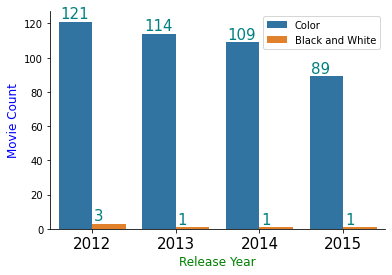

In [19]:
ax = sns.countplot(x='Release Year', data=df, hue='Color/B&W')
ax.set_xlabel('Release Year', fontsize=12, color='g')
ax.set_ylabel('Movie Count', fontsize=12, color='b')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='best')

for idx, p in enumerate(ax.patches):
    ax.annotate("{}".format(p.get_height()), 
                (p.get_x()+0.02, p.get_height()+2), 
                fontsize=15, color='teal')

* We have used three parameters of countplot function –
> * **`x`** – It takes the column name of the categorical feature whose values will be shown on x-axis
> * **`hue`** – It takes the column name of the categorical feature of which we have to display the count.
> * **`data`** – It takes the dataframe which contains the above two features as its columns.
* The `ax.legend()` function is used to display the legends associated with each colored bar in the plot.
* Note that we can also pass to the parameters `x` and `hue` the `df['Release Year']` and `df['Color/B&W']` directly. In that case we don’t need to supply any value to `data` parameter.

Let’s now consider another example where we have to display the counts of movies under each genres for all the years.

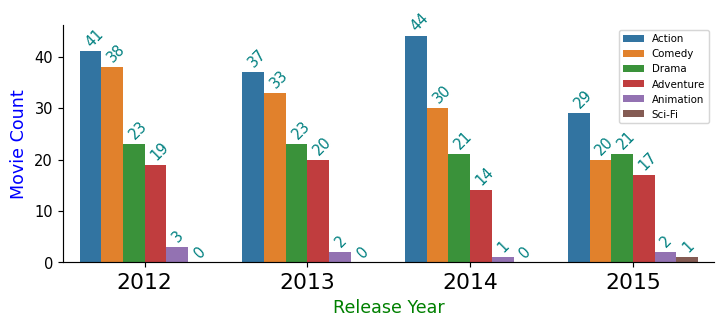

In [20]:
ax = sns.countplot(x='Release Year', data=df, hue='Genre')
ax.figure.set(figwidth=8, figheight=3, dpi=105)
ax.set_xlabel('Release Year', fontsize=12, color='g')
ax.set_ylabel('Movie Count', fontsize=12, color='b')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', fontsize=7)

for idx, p in enumerate(ax.patches):
    freq = 0 if np.isnan(p.get_height()) else int(p.get_height())
    ax.annotate("{}".format(freq),
                (p.get_x()+0.02, freq+1), 
                fontsize=10, color='teal', rotation=45)

* Note the use of rotation parameter in `ax.annnotate()` function. The default value is 0 (degree). We can rotate the text annotated on the plot according to our needs using this parameter.

Let’s take the last example of this article where we will draw the horizontal countplot to show the counts of movies under each year for all genres. The precondition is that the it should be color movies and released in USA.

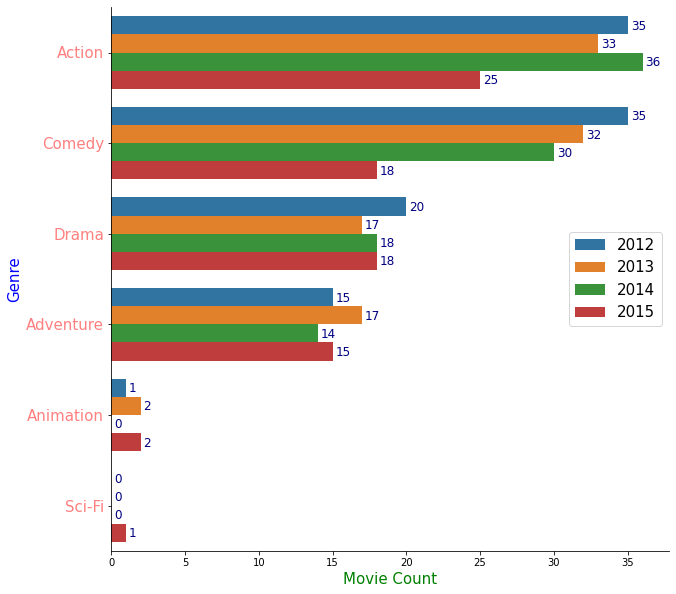

In [21]:
df_sub = df[(df.Country == 'USA') & (df['Color/B&W'] == 'Color')]
ax = sns.countplot(y='Genre', data=df_sub, hue='Release Year')
ax.figure.set(figwidth=10, figheight=10)
ax.set_xlabel('Movie Count', fontsize=15, color='g')
ax.set_ylabel('Genre', fontsize=15, color='b')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, color='#FF8080')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='best', fontsize=15)

for idx, p in enumerate(ax.patches):
    freq = 0 if np.isnan(p.get_width()) else int(p.get_width())
    ax.annotate("{}".format(freq), 
                (freq+0.2, p.get_y()+0.15), 
                fontsize=12, color='navy', rotation=0)

In this Notebook, we have learnt many useful applications of Seaborn’s countplot. We have demonstrated the use of hue parameter to visualize the counts of two related categorical features. We have also used pandas dataframe in countplot function to visualize the counts of various categorical features.

---
**The End**

---